In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

In [3]:
df = pd.read_csv("../data/imdb_movies.csv")

In [4]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [5]:
df.shape

(1000, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [7]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [8]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [9]:
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../data/imdb_movies.csv")


In [4]:
df["Released_Year"] = pd.to_numeric(df["Released_Year"], errors="coerce")
df["IMDB_Rating"] = pd.to_numeric(df["IMDB_Rating"], errors="coerce")
df["No_of_Votes"] = pd.to_numeric(df["No_of_Votes"], errors="coerce")

In [5]:
df = df.dropna(subset=["IMDB_Rating", "No_of_Votes", "Released_Year"])

In [6]:
df = df.drop_duplicates()

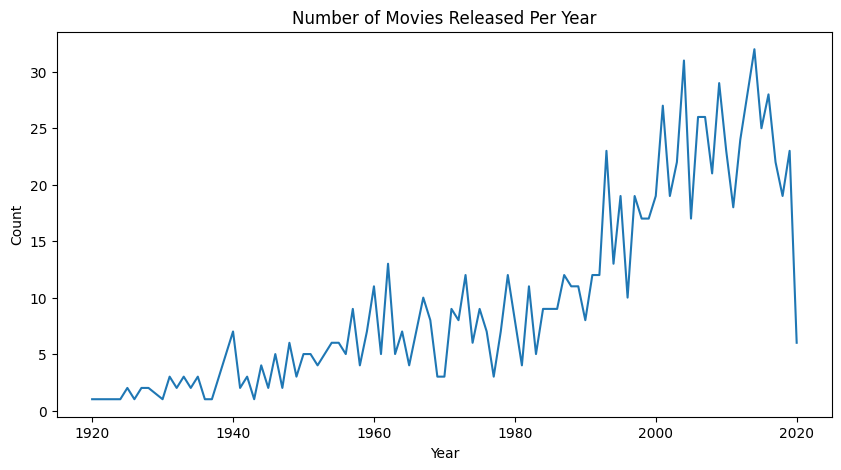

In [7]:
plt.figure(figsize=(10,5))
df["Released_Year"].value_counts().sort_index().plot()
plt.title("Number of Movies Released Per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

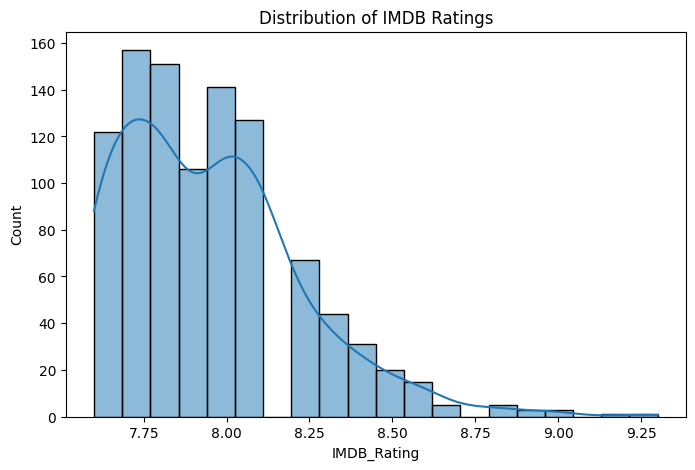

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df["IMDB_Rating"], bins=20, kde=True)
plt.title("Distribution of IMDB Ratings")
plt.show()

In [9]:
df.sort_values(by="IMDB_Rating", ascending=False)[
    ["Series_Title", "IMDB_Rating"]
].head(10)

,Series_Title,IMDB_Rating
0,The Shawshank Redemption,9.3
1,The Godfather,9.2
2,The Dark Knight,9.0
3,The Godfather: Part II,9.0
4,12 Angry Men,9.0
5,The Lord of the Rings: The Return of the King,8.9
6,Pulp Fiction,8.9
7,Schindler's List,8.9
8,Inception,8.8
9,Fight Club,8.8


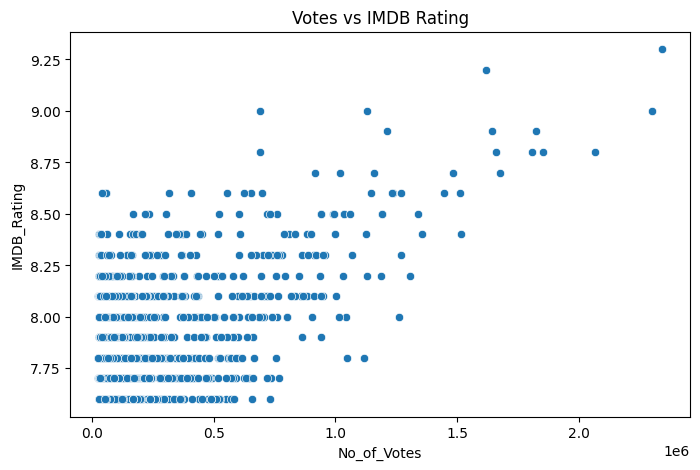

In [10]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="No_of_Votes", y="IMDB_Rating", data=df)
plt.title("Votes vs IMDB Rating")
plt.show()

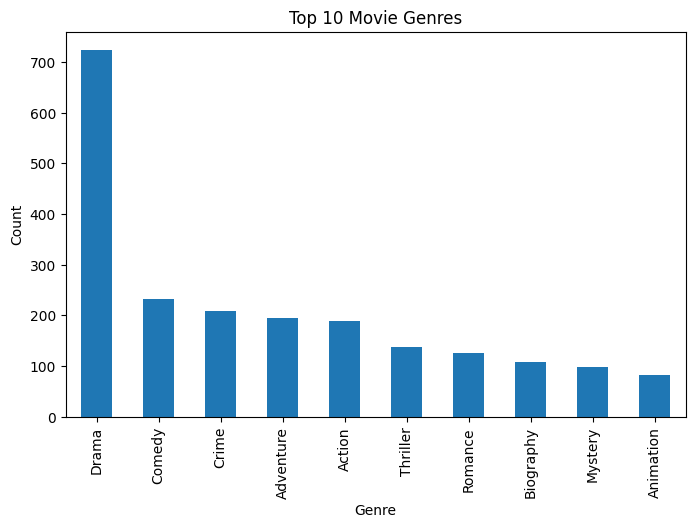

In [11]:
genre_counts = df["Genre"].str.split(", ").explode().value_counts().head(10)

plt.figure(figsize=(8,5))
genre_counts.plot(kind="bar")
plt.title("Top 10 Movie Genres")
plt.ylabel("Count")
plt.show()

In [12]:
average_rating = df["IMDB_Rating"].mean()
most_voted_movie = df.loc[df["No_of_Votes"].idxmax()]["Series_Title"]

average_rating, most_voted_movie

(np.float64(7.9496496496496505), 'The Shawshank Redemption')